Recurrent Neural Network (RNN) Tutorial for Beginners

https://www.simplilearn.com/tutorials/deep-learning-tutorial/rnn

* Check dimension for X_train should match network input  
* Check last RNN layer don't return sequences

[1] Recurrent Neural Network (RNN) Tutorial for Beginners  
https://www.simplilearn.com/tutorials/deep-learning-tutorial/rnn  
[2] Recurrent Neural Networks Tutorial, Part 1 – Introduction to RNNs  
http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns/  
[3] Introduction to Learning to Trade with Reinforcement Learning  
http://www.wildml.com/2018/02/introduction-to-learning-to-trade-with-reinforcement-learning/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Data prep
# Keras
# Evaluate


In [3]:
# load data  30:40
dataset = pd.read_csv("https://github.com/chayapan/thesis/raw/master/dataset/historical/ADVANC.csv")
dataset = dataset.set_index('Date')

dataset_train = dataset['2014-01-01':'2018-01-01']
dataset_train
# 1:2 -> Low
# 4:5 -> Volume
# 5:6 -> Adj Close

training_set_df = dataset_train.iloc[:, 5:6]
training_set = training_set_df.values # np.array

dataset_test = dataset['2018-01-02':'2019-01-01']
test_set = dataset_test.iloc[:, 5:6].values


In [4]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)



In [5]:
# Creating a data structure with 60 timesteps and 1 output
# 35:35  why 60 time-step

X_train = []
y_train = []
for i in range(60, len(training_set)):
    X_train.append(training_set_scaled[i-60:i, 0])  # 36:00   This is 0-59.
    y_train.append(training_set_scaled[i, 0])       # This is 60th.

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # This is important!!

# Error when checking input: expected lstm_1_input to have 3 dimensions, but got array with shape (429, 60)
# (429,60, 1)

X_train

array([[[0.32487746],
        [0.39570678],
        [0.43505635],
        ...,
        [0.62393389],
        [0.64754351],
        [0.63967402]],

       [[0.39570678],
        [0.43505635],
        [0.50588535],
        ...,
        [0.64754351],
        [0.63967402],
        [0.65380414]],

       [[0.43505635],
        [0.50588535],
        [0.47440592],
        ...,
        [0.63967402],
        [0.65380414],
        [0.6780275 ]],

       ...,

       [[0.74041928],
        [0.74530834],
        [0.72086272],
        ...,
        [0.67197101],
        [0.68174945],
        [0.67686023]],

       [[0.74530834],
        [0.72086272],
        [0.72086272],
        ...,
        [0.68174945],
        [0.67686023],
        [0.67686023]],

       [[0.72086272],
        [0.72086272],
        [0.72086272],
        ...,
        [0.67686023],
        [0.67686023],
        [0.701306  ]]])

In [6]:
# What does this look like?

# Depth (rows) and Each row size
len(X_train), len(X_train[0])

(915, 60)

In [7]:
# 

# 40:00 create model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout


Using TensorFlow backend.


In [8]:
# Initialize the RNN

regressor = Sequential()

In [9]:
# Adding the first LSTM layer and Dropout regularization
# 41:00 The units is dimensionality of the output space. 
# In this case we have 60 coming in and 50 going out.
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [10]:
# Adding a second LSTM layer and some Dropout regularization
# Dropout helps forget some information

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [11]:
# Adding a third LSTM layer and some Dropout regularization
# Dropout helps forget some information

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [12]:
# Adding a fourth LSTM layer and some Dropout regularization
# Dropout helps forget some information

regressor.add(LSTM(units=50)) # Last of RNN layer dont return sequences
regressor.add(Dropout(0.2))

In [13]:
# Adding the output layer
regressor.add(Dense(units=1))

# 9. Compile the RNN

In [14]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

# 10. Fit the RNN to the training set

In [15]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
915/915 [==============================] - 3s 3ms/step - loss: 0.0570
Epoch 2/100
915/915 [==============================] - 2s 2ms/step - loss: 0.0152
Epoch 3/100
915/915 [==============================] - 2s 2ms/step - loss: 0.0131
Epoch 4/100
915/915 [==============================] - 2s 2ms/step - loss: 0.0119
Epoch 5/100
915/915 [==============================] - 2s 2ms/step - loss: 0.0103
Epoch 6/100
915/915 [==============================] - 2s 2ms/step - loss: 0.0098
Epoch 7/100
915/915 [==============================] - 2s 2ms/step - loss: 0.0097
Epoch 8/100
915/915 [==============================] - 2s 2ms/step - loss: 0.0090
Epoch 9/100
915/915 [==============================] - 2s 2ms/step - loss: 0.0093
Epoch 10/100
915/915 [==============================] - 2s 2ms/step - loss: 0.0086
Epoch 11/100
915/915 [==============================] - 2s 2ms/step - loss: 0.0091
Epoch 12/100
915/915 [==============================] - 2s 2ms/step - loss: 0.0085
Epoch 13/100


915/915 [==============================] - 2s 2ms/step - loss: 0.0031
Epoch 100/100
915/915 [==============================] - 2s 2ms/step - loss: 0.0027


# 11. Load test data

In [16]:
real_stock_price = dataset_test.iloc[:, 5:6].values

# 12. Get the predicted stock price

In [17]:
dataset_total = pd.concat((dataset_train['Adj Close'], dataset_test['Adj Close']), axis=0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs

array([174.63606262, 174.63606262, 173.72174072, 175.55036926,
       175.0932312 , 174.63606262, 177.37904358, 177.37904358,
       178.29335022, 180.12199402, 182.4078064 , 178.29335022,
       176.00752258, 176.46470642, 178.29335022, 178.7505188 ,
       176.92185974, 177.37904358, 177.83621216, 176.46470642,
       171.43592834, 168.69293213, 170.52159119, 170.52159119,
       168.69293213, 165.03564453, 165.03564453, 162.74983215,
       165.03564453, 165.49281311, 166.40713501, 166.86430359,
       164.12130737, 163.66415405, 163.20700073, 160.00686646,
       162.29266357, 162.74983215, 160.92120361, 160.92120361,
       159.54969788, 160.00686646, 160.92120361, 162.74983215,
       162.74983215, 162.29266357, 163.66415405, 170.06442261,
       170.97875977, 169.60726929, 170.97875977, 167.77861023,
       168.69293213, 169.60726929, 170.06442261, 170.97875977,
       170.52159119, 170.52159119, 172.80740356, 174.63606262,
       179.66485596, 177.37904358, 178.29335022, 179.20

In [18]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [19]:
X_test = []
for i in range(60, len(dataset_test) + 60):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# 13. Visualize the results

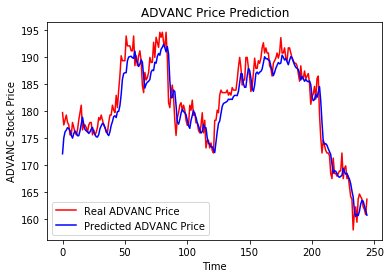

In [20]:
plt.plot(real_stock_price, color = 'red', label='Real ADVANC Price')
plt.plot(predicted_stock_price, color='blue',label='Predicted ADVANC Price')
plt.title('ADVANC Price Prediction')
plt.xlabel('Time')
plt.ylabel('ADVANC Stock Price')
plt.legend()
plt.show()